## Project 2 - Fun with Filters and Frequencies

In [1]:
#First, show the partial derivative in x and y of the cameraman image by convolving the image with finite difference operators D_x and D_y (you can use convolve2d from scipy.signal library). Now compute and show the gradient magnitude image. 
#To turn this into an edge image, lets binarize the gradient magnitude image by picking the appropriate threshold (trying to suppress the noise while showing all the real edges; it will take you a few tries to find the right threshold; 
#This threshold is meant to be assessed qualitatively).

#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage as sk
import skimage.io as skio
import scipy as sp
import os
import cv2

In [96]:
#now convolve the image with the finite difference operators D_x and D_y, can use convolve2d from scipy

deriv_x = np.array([[1,-1]])
deriv_y = np.array([[1],[-1]])

print(deriv_x)
print(deriv_y)
#read the image
im = skio.imread('data/cameraman.png')
im = sk.util.img_as_float(im)
print(im.shape)

#finite difference operator convolution
im_x = sp.signal.convolve2d(im[:,:,1], deriv_x, mode='same')
im_y = sp.signal.convolve2d(im[:,:,1], deriv_y, mode='same')

#gradient magnitude image
im_grad = np.sqrt(im_x**2 + im_y**2)

#binarize the gradient magnitude image

#show the image
plt.imshow(im_x, cmap='gray')
plt.show()
plt.imsave('fdx.png', im_x, cmap='gray')
plt.imshow(im_y, cmap='gray')
plt.show()
plt.imsave('fdy.png', im_y, cmap='gray')
plt.imshow(im_grad, cmap='gray')
plt.show()
plt.imsave('fdmag.png', im_grad, cmap='gray')
edge_x = im_x > 0.2
plt.imsave('fdxbin.png', edge_x, cmap='gray')
edge_y = im_y > 0.2
plt.imsave('fdybin.png', edge_y, cmap='gray')
edge_im = im_grad > 0.2
plt.imshow(edge_im, cmap='gray')
plt.show()
plt.imsave('fdmagbin.png', edge_im, cmap='gray')


[[ 1 -1]]
[[ 1]
 [-1]]
(542, 540, 4)


In [97]:
#We noted that the results with just the difference operator were rather noisy. Luckily, we have a smoothing operator handy: the Gaussian filter G. Create a blurred version of the original image by convolving with a gaussian and repeat the procedure in the previous part (one way to create a 2D gaussian filter is by using cv2.getGaussianKernel() to create a 1D gaussian and then taking an outer product with its transpose to get a 2D gaussian kernel).
#Now we can do the same thing with a single convolution instead of two by creating a derivative of gaussian filters. Convolve the gaussian with D_x and D_y and display the resulting DoG filters as images.
#Verify that you get the same result as before.
gaussian_filter = cv2.getGaussianKernel(10, 1)
#get outer product with transpose
gaussian_filter = np.outer(gaussian_filter, gaussian_filter.T)
#now use this filter to blur the image

im_blur = sp.signal.convolve2d(im[:,:,1], gaussian_filter, mode='same')

#show the blurred image
plt.imshow(im_blur, cmap='gray')
plt.show()

#now convolve the gaussian filter with the derivative operators
im_x_gauss = sp.signal.convolve2d(im_blur, deriv_x, mode='same')
plt.imsave('fdx_gauss.png', im_x_gauss, cmap='gray')
im_y_gauss = sp.signal.convolve2d(im_blur, deriv_y, mode='same')
plt.imsave('fdy_gauss.png', im_y_gauss, cmap='gray')

grad_gauss = np.sqrt(im_x_gauss**2 + im_y_gauss**2)
plt.imsave('fdmag_gauss.png', grad_gauss, cmap='gray')

plt.imshow(grad_gauss, cmap='gray')
plt.show()

binarized_grad_gauss = grad_gauss > 0.1
plt.imsave('fdmag_gaussbin.png', binarized_grad_gauss, cmap='gray')

bin_x_gauss = im_x_gauss > 0.1
plt.imsave('fdx_gaussbin.png', bin_x_gauss, cmap='gray')
bin_y_gauss = im_y_gauss > 0.1
plt.imsave('fdy_gaussbin.png', bin_y_gauss, cmap='gray')

plt.imshow(binarized_grad_gauss, cmap='gray')
plt.show()


In [98]:
#now using one conv

gaussian_x = sp.signal.convolve2d(gaussian_filter, deriv_x, mode='same')
gaussian_y = sp.signal.convolve2d(gaussian_filter, deriv_y, mode='same')

one_conv_x = sp.signal.convolve2d(im[:,:,1], gaussian_x, mode='same')
one_conv_y = sp.signal.convolve2d(im[:,:,1], gaussian_y, mode='same')

plt.imshow(one_conv_x, cmap='gray')
plt.show()
plt.imsave('one_conv_x.png', one_conv_x, cmap='gray')


plt.imshow(one_conv_y, cmap='gray')
plt.show()
plt.imsave('one_conv_y.png', one_conv_y, cmap='gray')

one_conv_grad = np.sqrt(one_conv_x**2 + one_conv_y**2)
plt.imshow(one_conv_grad, cmap='gray')
plt.show()

plt.imsave('one_conv_grad.png', one_conv_grad, cmap='gray')

binarized_one_conv_grad = one_conv_grad > 0.1
plt.imshow(binarized_one_conv_grad, cmap='gray')
plt.show()
plt.imsave('one_conv_gradbin.png', binarized_one_conv_grad, cmap='gray')

bin_x_one_conv = one_conv_x > 0.1
plt.imsave('one_conv_xbin.png', bin_x_one_conv, cmap='gray')

bin_y_one_conv = one_conv_y > 0.1
plt.imsave('one_conv_ybin.png', bin_y_one_conv, cmap='gray')

## Part 2.1: Image Sharpening

In [102]:
#Pick your favorite blurry image and get ready to "sharpen" it! We will derive the unsharp masking technique. Remember our favorite Gaussian filter from class. This is a low pass filter that retains only the low frequencies. We can subtract the blurred version from the original image to get the high frequencies of the image. An image often looks sharper if it has stronger high frequencies. So, lets add a little bit more high frequencies to the image! Combine this into a single convolution operation which is called the unsharp mask filter.

#read in the taj image
taj = skio.imread('data/taj.jpg')
taj = sk.util.img_as_float(taj)

#let's define a helper function to do the sharpening!

def sharpen(im, alpha=2, save_blur=False):
    #get the gaussian filte
    gaussian_filter = cv2.getGaussianKernel(10, 1)
    gaussian_filter = np.outer(gaussian_filter, gaussian_filter.T)
    #get the blurred image
    im_blur_r = sp.signal.convolve2d(im[:,:,0], gaussian_filter, mode='same')
    im_blur_g = sp.signal.convolve2d(im[:,:,1], gaussian_filter, mode='same')
    im_blur_b = sp.signal.convolve2d(im[:,:,2], gaussian_filter, mode='same')

    if save_blur:
        plt.imsave('data/blurred_ring.jpg', np.stack([im_blur_r, im_blur_g, im_blur_b], axis=2))

    high_frequencies_r = im[:,:,0] - im_blur_r
    high_frequencies_g = im[:,:,1] - im_blur_g
    high_frequencies_b = im[:,:,2] - im_blur_b

    sharpened_im = im[:]
    sharpened_im[:,:,0] = im[:,:,0] + 2*high_frequencies_r
    sharpened_im[:,:,1] = im[:,:,1] + 2*high_frequencies_g
    sharpened_im[:,:,2] = im[:,:,2] + 2*high_frequencies_b

    #clip the values to be between 0 and 1
    sharpened_im = np.clip(sharpened_im, 0, 1)

    return sharpened_im

#sharpen the taj mahal
sharpened_im = sharpen(taj, 2)
plt.imsave('data/sharpened_taj.jpg', sharpened_im)
plt.imshow(sharpened_im)
plt.show()

In [91]:
#sharpening more images:
minas_tirith = skio.imread('data/minas_tirith.jpg')
minas_tirith = sk.util.img_as_float(minas_tirith)

sharpened_mt = sharpen(minas_tirith, 2)
plt.imshow(sharpened_mt)
plt.show()
plt.imsave('data/sharpened_mt.jpg', sharpened_mt)

In [104]:
ring = skio.imread('data/onering.jpg')
ring = sk.util.img_as_float(ring)

sharpened_ring = sharpen(ring, 2, save_blur=True)
plt.imshow(sharpened_ring)
plt.show()
plt.imsave('data/sharpened_onering.jpg', sharpened_ring)

## Part 2.2: Hybrid Images

Please select 2 points in each image for alignment.
(1177, 733, 3)


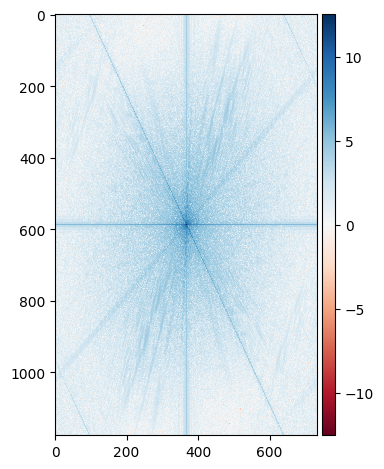

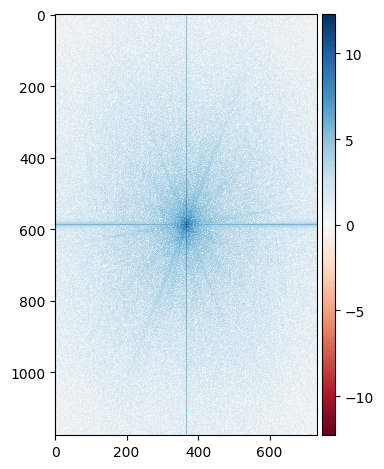

High frequency data/nutmeg.jpg


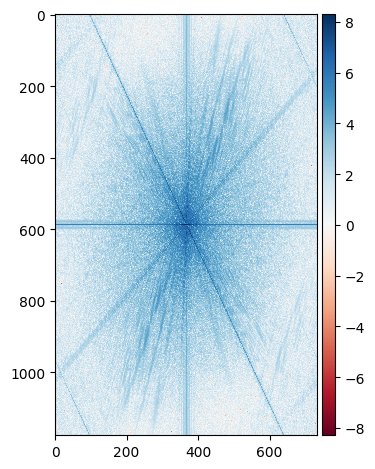

Low frequency data/DerekPicture.jpg


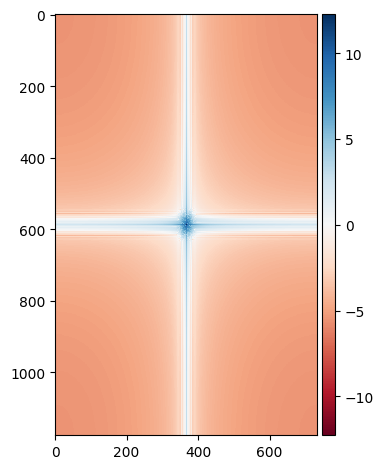

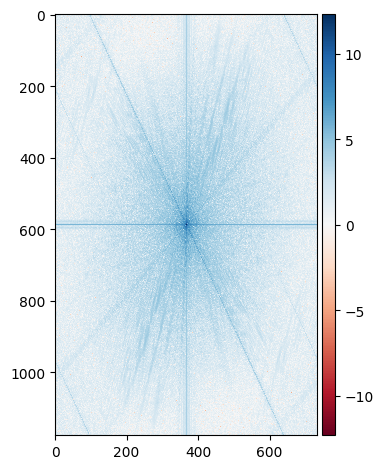

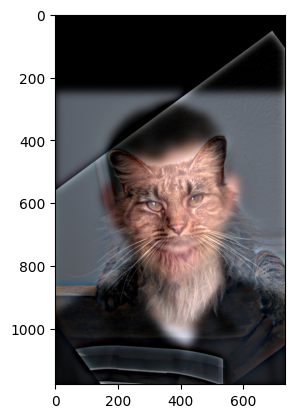

In [112]:
from data.align_image_code import align_images
#lets make a hybrid image function
def hybridize(im1_path, im2_path, kernel_factor, sigma):
    gray_scale_coeff = np.array([0.2125, 0.7154, 0.0721])
    # high sf
    im1 = plt.imread(im1_path)/255.

    # low sf
    im2 = plt.imread(im2_path)/255

    # Next align images (this code is provided, but may be improved)
    %matplotlib qt
    im1_aligned, im2_aligned = align_images(im1, im2)

    #create a low pass filter and a high pass filter
    low_pass = cv2.getGaussianKernel(kernel_factor * sigma, sigma) @ cv2.getGaussianKernel(kernel_factor * sigma, sigma).T
    
    #For a high-pass filter, they suggest using the impulse filter minus the Gaussian filter (which can be computed by subtracting the Gaussian-filtered image from the original)
    print(im1_aligned.shape)

    #get the impulse response filter
    impulse = np.zeros((kernel_factor * sigma, 1))
    impulse[kernel_factor // 2 * sigma] = 1
    impulse = impulse @ impulse.T
    high_pass = impulse - low_pass

    #how to convolve over all 3 color channels at once
    high_frequencies = sp.signal.convolve(im1_aligned, high_pass[:,:,None], mode='same')
    low_frequencies = sp.signal.convolve(im2_aligned, low_pass[:,:,None], mode='same')

    #show fft for original images grayscaled
    gray_scale_im1 = im1_aligned@gray_scale_coeff
    gray_scale_im2 = im2_aligned@gray_scale_coeff

    fft_im1 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_scale_im1))))
    fft_im2 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_scale_im2))))
    %matplotlib inline
    skio.imshow(fft_im1)
    skio.show()
    #convert fft_im1 to saveable image
    #skio.imsave('data/fft_im1.jpg', fft_im1)
    skio.imshow(fft_im2)
    skio.show()
    #skio.imsave('data/fft_im2.jpg', fft_im2)

    print(f'High frequency {im1_path}')
    gray_scale_hf = high_frequencies@gray_scale_coeff
    fft_hf = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_scale_hf))))
    skio.imshow(fft_hf)
    skio.show()
    #skio.imsave('data/fft_high_frequencies.jpg', fft_hf)

    print(f'Low frequency {im2_path}')
    gray_scale_lf = low_frequencies@gray_scale_coeff
    fft_lf = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_scale_lf))))
    skio.imshow(fft_lf)
    skio.show()
    #skio.imsave('data/fft_low_frequencies.jpg', fft_lf)

    hybrid = np.clip(low_frequencies + high_frequencies, 0, 1)
    gray_scale_hybrid = hybrid@gray_scale_coeff
    fft_hybrid = np.log(np.abs(np.fft.fftshift(np.fft.fft2(gray_scale_hybrid))))
    skio.imshow(fft_hybrid)
    skio.show()
    #skio.imsave('data/fft_hybrid.jpg', fft_hybrid)
    return hybrid


hybrid = hybridize('data/nutmeg.jpg', 'data/DerekPicture.jpg', 6, 13)
plt.imshow(hybrid)
plt.show()

Please select 2 points in each image for alignment.
(334, 189, 3)


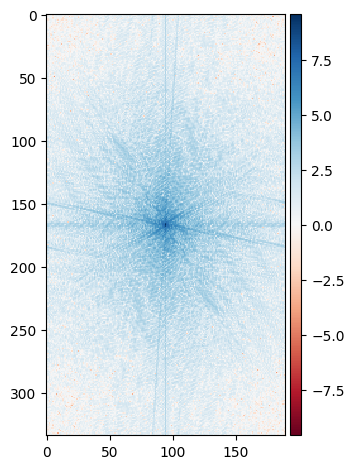

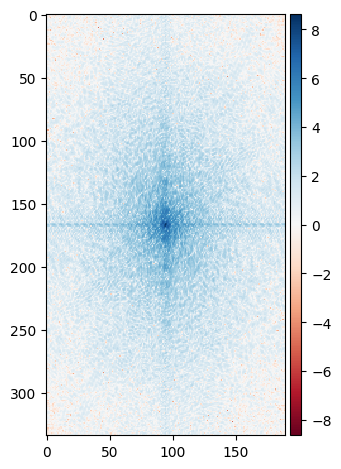

High frequency data/legolas.jpg


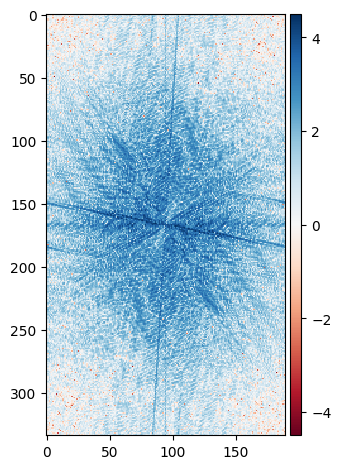

Low frequency data/bilbo.jpg


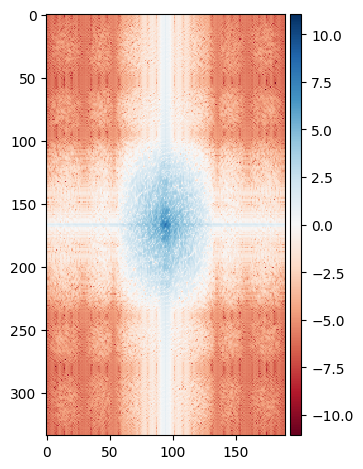

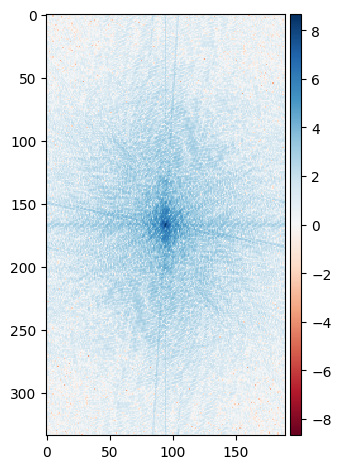

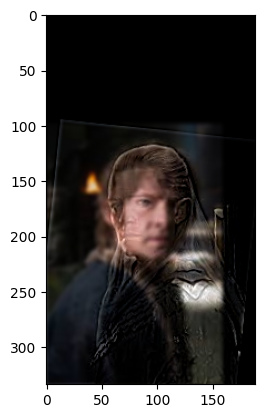

In [129]:
#lets get another hybrid image, this time legolas and bilbo
hybrid = hybridize('data/legolas.jpg', 'data/bilbo.jpg', 3, 2)
plt.imshow(hybrid)
plt.show()
plt.imsave('data/bilbolas.jpg', hybrid)

Please select 2 points in each image for alignment.
(274, 174, 3)


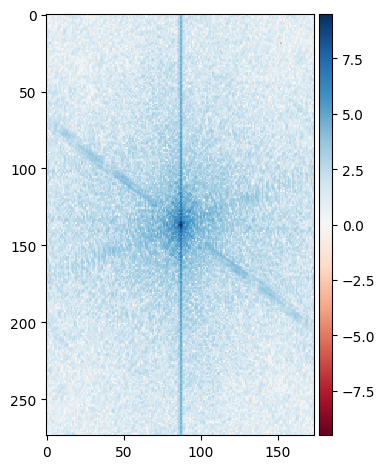

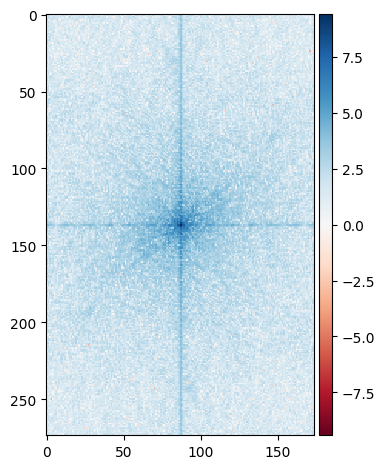

High frequency data/gimli.jpg


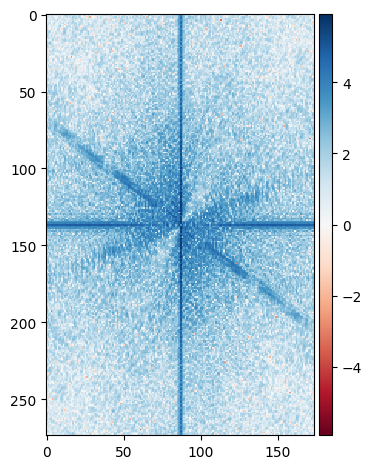

Low frequency data/dumbledore.jpg


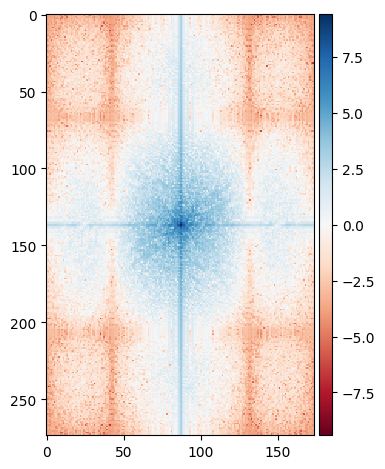

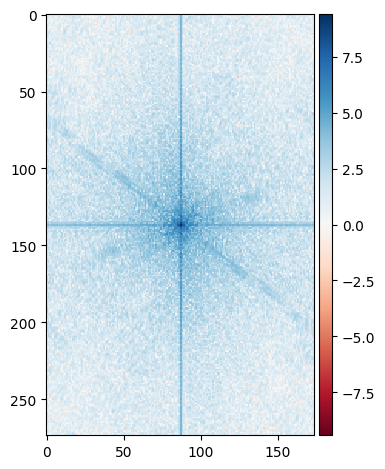

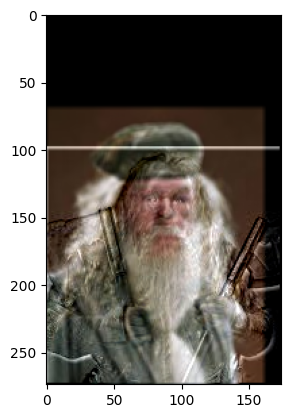

In [137]:
hybrid = hybridize('data/gimli.jpg', 'data/dumbledore.jpg', 1, 4)
plt.imshow(hybrid)
plt.show()
plt.imsave('data/gumbledore.jpg', hybrid)

## Part 2.3: Gaussian and Laplacian Stacks

In [53]:
def normalize(im):
    #per channel normalization
    channels = []
    for i in range(3):
        channel = im[:,:,i]
        minimum = np.min(channel)
        maximum = np.max(channel)
        channels.append((channel - minimum) / (maximum - minimum))
    return np.dstack(channels)

def create_stacks(im, stack_size, sigma):
    gaussian_stack, laplacian_stack = [im], []
    for _ in range(stack_size + 1):
        gaussian_filter = cv2.getGaussianKernel(6 * sigma, sigma) @ cv2.getGaussianKernel(6 * sigma, sigma).T
        prev_layer = gaussian_stack[-1]
        #convolve each layer separately
        next_layer = sp.signal.convolve(prev_layer, gaussian_filter[:,:, None], mode='same')
        #next_layer = normalize(next_layer)
        gaussian_stack.append(next_layer)
        
        laplacian_layer = prev_layer - next_layer
        #laplacian_layer = normalize(laplacian_layer)
        laplacian_stack.append(laplacian_layer)

        sigma = sigma * 2
    gaussian_stack.pop()
    return gaussian_stack, laplacian_stack

im_apple = plt.imread('data/apple.jpeg') / 255
im_orange = plt.imread('data/orange.jpeg') / 255

def visualize_all_frequencies(apple_gaussian_stack, apple_laplacian_stack, orange_gaussian_stack, orange_laplacian_stack):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Low frequency: Gaussian stack level 4
    axes[0, 0].imshow(normalize(apple_laplacian_stack[4]))
    axes[0, 0].set_title('Apple - Low Frequency (Depth 4)')
    axes[0, 0].axis('off')
    
    axes[1, 0].imshow(normalize(orange_laplacian_stack[4]))
    axes[1, 0].set_title('Orange - Low Frequency (Depth 4)')
    axes[1, 0].axis('off')

    # Medium frequency: Laplacian stack level 2
    axes[0, 1].imshow(normalize(apple_laplacian_stack[2]))
    axes[0, 1].set_title('Apple - Medium Frequency (Depth 2)')
    axes[0, 1].axis('off')
    
    axes[1, 1].imshow(normalize(orange_laplacian_stack[2]))
    axes[1, 1].set_title('Orange - Medium Frequency (Depth 2)')
    axes[1, 1].axis('off')

    # High frequency: Laplacian stack level 0
    axes[0, 2].imshow(normalize(apple_laplacian_stack[0]))
    axes[0, 2].set_title('Apple - High Frequency (Depth 0)')
    axes[0, 2].axis('off')
    
    axes[1, 2].imshow(normalize(orange_laplacian_stack[0]))
    axes[1, 2].set_title('Orange - High Frequency (Depth 0)')
    axes[1, 2].axis('off')

    plt.show()
# Create Gaussian and Laplacian stacks for each image using your function
stack_size = 8  # Number of levels in the stack
sigma = 1  # Initial sigma value

apple_gaussian_stack, apple_laplacian_stack = create_stacks(im_apple, stack_size, sigma)
orange_gaussian_stack, orange_laplacian_stack = create_stacks(im_orange, stack_size, sigma)

# Visualize the frequency parts of each image
visualize_all_frequencies(apple_gaussian_stack, apple_laplacian_stack, orange_gaussian_stack, orange_laplacian_stack)



## Part 2.4: Creating Blended Images

In [92]:
def create_blended_image(im_path_1, im_path_2, stack_size, sigma, name, mask=[]):
    im1 = plt.imread(im_path_1) / 255
    im2 = plt.imread(im_path_2) / 255
    print(im1.shape)
    print(im2.shape)
    if len(mask) == 0:
        mask = np.concatenate([np.ones((im1.shape[0], int(math.floor(im1.shape[1] / 2)), im1.shape[2])), np.zeros((im1.shape[0], int(math.ceil(im1.shape[1] / 2)), im1.shape[2]))], axis=1)

    gaussian_mask = create_stacks(mask, stack_size, sigma)[0]

    gaussian_stack_1, laplacian_stack_1 = create_stacks(im1, stack_size, sigma)
    gaussian_stack_2, laplacian_stack_2 = create_stacks(im2, stack_size, sigma)

    blended_stack = []
    for i in range(stack_size):
        laplacian_layer_1 = laplacian_stack_1[i]
        laplacian_layer_2 = laplacian_stack_2[i]
        mask_layer = gaussian_mask[i]

        blended_masked_layer = laplacian_layer_1 * mask_layer + laplacian_layer_2 * (1 - mask_layer)
        blended_stack.append(blended_masked_layer)

        #save the blended image at this layer into the data folder
        plt.imsave('blended_images/' + name + f'blended_{i}.png', normalize(blended_masked_layer))
        plt.imsave(f'blended_images/mask{i}.png', normalize(mask_layer))
    

    #add the gaussian stack last layer image
    blended_stack.append(gaussian_stack_1[0] * mask_layer + gaussian_stack_2[0] * (1 - mask_layer))
    blend = np.clip(np.sum(blended_stack, axis=0), 0, 1)
    plt.imsave('blended_images/' + name + 'blended.png', blend)
    return blend


import math
apple = 'data/apple.jpeg'
orange = 'data/orange.jpeg'

sigma=1

blended_image = create_blended_image(apple, orange, stack_size, sigma, "orapple")


(300, 300, 3)
(300, 300, 3)


In [93]:
#let's make some more blended images with different masks
#let's do barad dur on the windows xp background
im1 = 'data/baraddur.jpg'
im2 = 'resized/windowsxp.jpg'
sigma = 1

#read in the barad dur mask
mask = skio.imread('data/baraddurmask.png')
print(mask.shape)
mask = np.mean(mask[:, :, :3], axis=2)
print(f"Grayscale image shape: {mask.shape}")

three_channel_mask = np.stack([mask, mask, mask], axis=-1)
print(f"Three-channel grayscale image shape: {three_channel_mask.shape}")

three_channel_mask = np.clip(three_channel_mask, 0, 1)
plt.imsave(f'blended_images/testmask.png', three_channel_mask, cmap='gray')

#make mask either 0 or 1

blended_image = create_blended_image(im1, im2, stack_size, sigma, 'baraddowsxp', three_channel_mask)


(796, 1920, 4)
Grayscale image shape: (796, 1920)
Three-channel grayscale image shape: (796, 1920, 3)
(796, 1920, 3)
(796, 1920, 3)


Grayscale image shape: (300, 500)
Three-channel grayscale image shape: (300, 500, 3)
